In [1]:
import numpy as np
import os
import urllib.request as urllib
import gzip
import struct
import base64

In [2]:
def download_data(url, force_download=True):
    fname=url.split("/")[-1]
    if force_download or not os.path.exists(fname):
        urllib.urlretrieve(url,fname)
    return fname

In [3]:
def read_data(label_url, image_url):
    with gzip.open(download_data(label_url)) as flbl:
        magic, num =struct.unpack(">II", flbl.read(8))
        label=np.frombuffer(flbl.read(), dtype=np.int8)
    with gzip.open(download_data(image_url), 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        image = np.frombuffer(fimg.read(), dtype=np.uint8).reshape(len(label), rows, cols)
        return (label, image)

In [4]:
path='http://yann.lecun.com/exdb/mnist/'

In [5]:
(train_lbl, train_img) = read_data(path+'train-labels-idx1-ubyte.gz', path+'train-images-idx3-ubyte.gz')
(val_lbl, val_img) = read_data(path+'t10k-labels-idx1-ubyte.gz', path+'t10k-images-idx3-ubyte.gz')

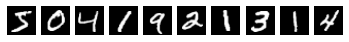

Label: [5 0 4 1 9 2 1 3 1 4]


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
 
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_img[i], cmap='Greys_r')
    plt.axis('off')
plt.show()
print('Label: %s' % (train_lbl[0:10],))